# Network Analytics

In [1]:
%matplotlib inline

# filter warnings
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run '../src/helper/network.py'

In [3]:
# instantiate the class
nwk = Network() 

# Load network data

In [4]:
df = pd.read_csv('../data/network_data.csv', sep = '\t')
df.arXiv_id = df['arXiv_id'].astype(str) # convert to string
print('Data size', df.shape)
df.tail(10)

Data size (1110599, 5)


,arXiv_id,author,rsp,year,length_auth
1110589,1208.4232,ManjavacasAlejandro,1,2012,19
1110590,1202.4394,SuzukiNorikazuNihon,1,2012,19
1110591,1902.09249,LiermannHanns-Peter,1,2019,19
1110592,cond-mat/0506088,BhattacharyaSomnath,1,2005,19
1110593,1207.2788,Gomez-GardeñesJesus,1,2012,19
1110594,2003.05713,Caroca-CanalesNubia,1,2020,19
1110595,802.4419,MunarrizJavierBIFI-,1,2008,19
1110596,1211.7265,WeidemüllerMatthias,1,2012,19
1110597,2006.12181,RadenovicAleksandra,1,2020,19
1110598,904.0659,KulakowskiKrzysztof,1,2009,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110599 entries, 0 to 1110598
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   arXiv_id     1110599 non-null  object
 1   author       1110598 non-null  object
 2   rsp          1110599 non-null  int64 
 3   year         1110599 non-null  int64 
 4   length_auth  1110599 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 42.4+ MB


# Bipartite network analytics

In [6]:
# Construct bipartite network
G, paper_nodes, author_nodes = nwk.bigraph(df, 'arXiv_id', 'author', 'rsp')

In [7]:
# Network info
nwk.binet_info(G, paper_nodes, author_nodes)

Total papers: 292702
Total authors: 233239
Average authors per paper: 3.7925
Average papers per author: 4.7593
-----------------------------------
Bipartite network: True
Connected: False
Clustering coefficient: 0.1053
Density: 1.6e-05
-----------------------------------
Name: 
Type: Graph
Number of nodes: 525941
Number of edges: 1110058
Average degree:   4.2212


In [8]:
# Display network in two layouts
# nwk.plot_bigraph(G, paper_nodes, author_nodes, title = None)

# Bipartite degree distribution

In [9]:
author_dgr, author_dgr_proba = nwk.bidegree_dist(G, author_nodes)
paper_dgr, paper_dgr_proba = nwk.bidegree_dist(G, paper_nodes)

In [10]:
author_dgr = author_dgr.sort_values(by='dgr', ascending=False).reset_index(drop=True)
author_dgr.columns = ['author', '# of papers']
author_dgr.head(10)

,author,# of papers
0,WatanabeKenji,850
1,TaniguchiTakashi,849
2,SarmaS,627
3,WangX,458
4,PeetersF,456
5,LossDaniel,409
6,WestK,409
7,PfeifferL,406
8,CanfieldP,382
9,KatsnelsonM,376


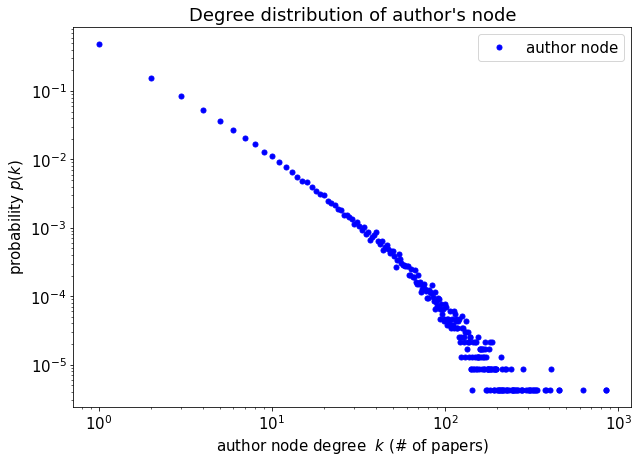

In [11]:
nwk.plot_dgr_dist(author_dgr_proba, xlab=r'author node degree  $k$ (# of papers)',
                  title="Degree distribution of author's node", label = 'author node')

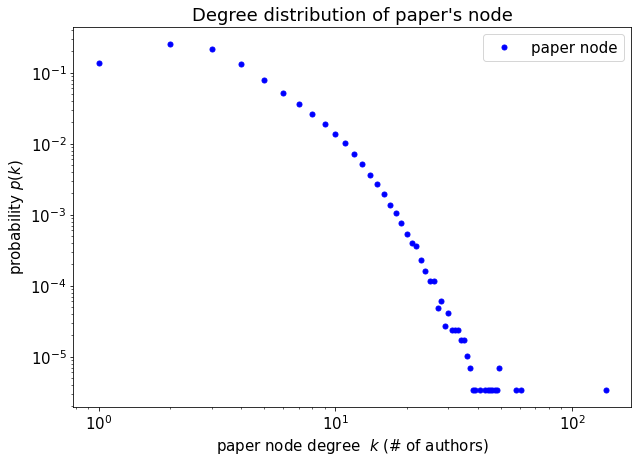

In [12]:
nwk.plot_dgr_dist(paper_dgr_proba, xlab=r'paper node degree  $k$ (# of authors)', 
                  title="Degree distribution of paper's node", label='paper node')

# Network projection

## A. Author's node

In [13]:
aG = nwk.projected_bigraph(G, author_nodes)

In [14]:
nwk.net_info(aG)

Connected: False
Mean clustering coefficient: 0.6785
Density: 0.0001
Modularity: 0.7244
Communities: 7588
Isolates Nodes: 3500
-----------------------------------
Name: 
Type: Graph
Number of nodes: 233239
Number of edges: 1748683
Average degree:  14.9948


In [15]:
author_dgr_, author_dgr_proba_ = nwk.degree_dist(aG)

In [16]:
author_dgr_ = author_dgr_.sort_values(by='dgr', ascending=False).reset_index(drop=True)
author_dgr_.columns = ['author', '# of collaborators']
author_dgr_.head(10)

,author,# of collaborators
0,WatanabeKenji,3433
1,TaniguchiTakashi,3431
2,WangX,1342
3,WangY,1299
4,KimJ,1252
5,ChenY,1190
6,WangZ,1142
7,ChenX,1090
8,LeeS,1061
9,CavaR,936


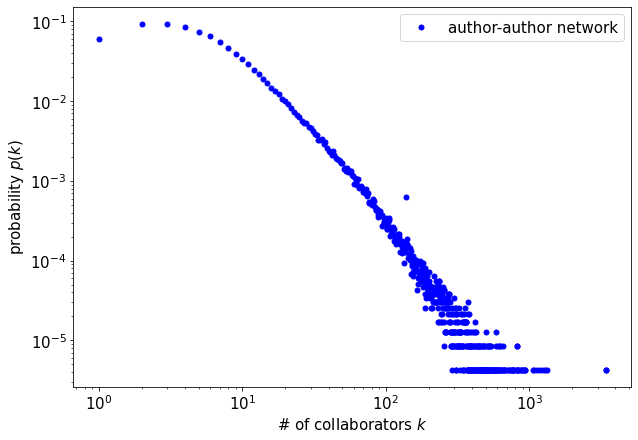

In [17]:
nwk.plot_dgr_dist(author_dgr_proba_, xlab = r'# of collaborators $k$', title = None, 
                  label = 'author-author network')

## B. Paper's node

In [18]:
pG = nwk.projected_bigraph(G, paper_nodes)

In [19]:
paper_dgr_, paper_dgr_proba_ = nwk.degree_dist(pG)
paper_dgr_proba_.head()

,dgr,dgr_proba
0,0,0.017684
1,1,0.014568
2,2,0.013871
3,3,0.012924
4,4,0.012808


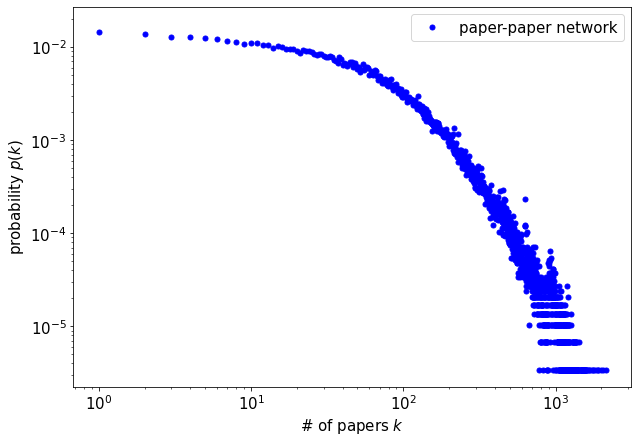

In [21]:
nwk.plot_dgr_dist(paper_dgr_proba_, xlab = r'# of papers $k$', title = None, 
                  label = 'paper-paper network')